# Assigment 3

## "Bank Marketing Data Set"

### Import Library

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, normalize, StandardScaler
from sklearn import metrics
import statsmodels.api as sm
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [8]:
# Mendeteksi format dari non standard missing values
missing = ['NA', 'NaN', 'na', 'n/a', 'N/A', 'n-a', ' ', ' -  ',  "--", "?"]

df= pd.read_csv('bank-additional-full.csv', sep=';', na_values=missing)

df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [10]:
#Dimension of dataframe
rows, columns = df.shape
print("Dimensi data:")
print(rows, "baris")
print(columns, "kolom")

Dimensi data:
41188 baris
21 kolom


In [11]:
df.index

RangeIndex(start=0, stop=41188, step=1)

In [12]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [13]:
df.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [14]:
# Melihat nilai unique
for col in df.columns:
    print("Nilai Unique Kolom", col)
    print(df[col].unique())
    print("-"*80)

Nilai Unique Kolom age
[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
--------------------------------------------------------------------------------
Nilai Unique Kolom job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
--------------------------------------------------------------------------------
Nilai Unique Kolom marital
['married' 'single' 'divorced' 'unknown']
--------------------------------------------------------------------------------
Nilai Unique Kolom education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
--------------------------------------------------------------------------------
Nilai Unique Kolom default
[

In [15]:
print('Jumlah Missing Value tiap column: ')
df.isnull().sum() #Check if any column has null values

Jumlah Missing Value tiap column: 


age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [16]:
print('Jumlah Duplicate Data ', df.duplicated().sum()) #Check duplicate data

Jumlah Duplicate Data  12


Berdasarkan hasil diatas, ditemukan bahwa:

- Dimensi data sejumlah 41188 baris dan 21 kolom ('age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y')
- Index data mulai dari 0 sampai 41188
- Tidak terdapat missing value
- Terdapat duplicate data sejumlah 12 data
- pada column pdays terdapat data 999 yang artinya berarti klien tidak pernah dihubungi sebelumnya, jadi untuk data 999 ini akan diganti dengan 0.

In [17]:
# Delete Duplicate column
df.drop_duplicates(subset=df.columns,keep='first', inplace=True)
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [18]:
# Mengganti nama kolom 'y' menjadi 'subs.deposit'
df.rename(columns={'y':'subs.deposit'}, inplace=True)

In [19]:
# Mengganti nilai 999 pada pdays menjadi 0
df['pdays'].replace(999, 0, inplace=True)

In [20]:
# Mengelompokkan kolom numerik dan kategorikal 
numeric_columns = list(df.select_dtypes(include=['int64']).columns.values) + list(df.select_dtypes(include=['float64']).columns.values)
categoric_columns = list(df.select_dtypes(include=['object']))

print('Numerik :', numeric_columns)
print('Kategorik :', categoric_columns)

Numerik : ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
Kategorik : ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'subs.deposit']


no     36537
yes     4639
Name: subs.deposit, dtype: int64


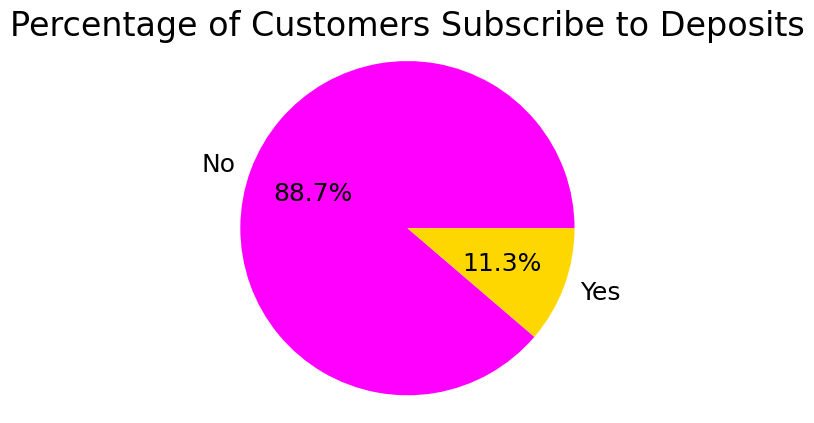

In [21]:
# melihat presentase dari nasabah yang berlangganan deposito jangka panjang dan yang tidak berlangganan
plt.title("Percentage of Customers Subscribe to Deposits", fontsize=24)
subscribed_values_count = df['subs.deposit'].value_counts()
subscribed_size = subscribed_values_count.values.tolist()
subscribed_labels = 'No', 'Yes'
colors = ['fuchsia', 'gold']
pcs, texts, autotexts = plt.pie(subscribed_size,
                                labels=subscribed_labels,
                                colors=colors,
                                autopct='%1.1f%%',
                                shadow=False,
                                startangle=0)

for text, autotext in zip(texts, autotexts):
    text.set_fontsize(18)
    autotext.set_fontsize(18)

plt.axis('equal')
print(subscribed_values_count)
plt.show()

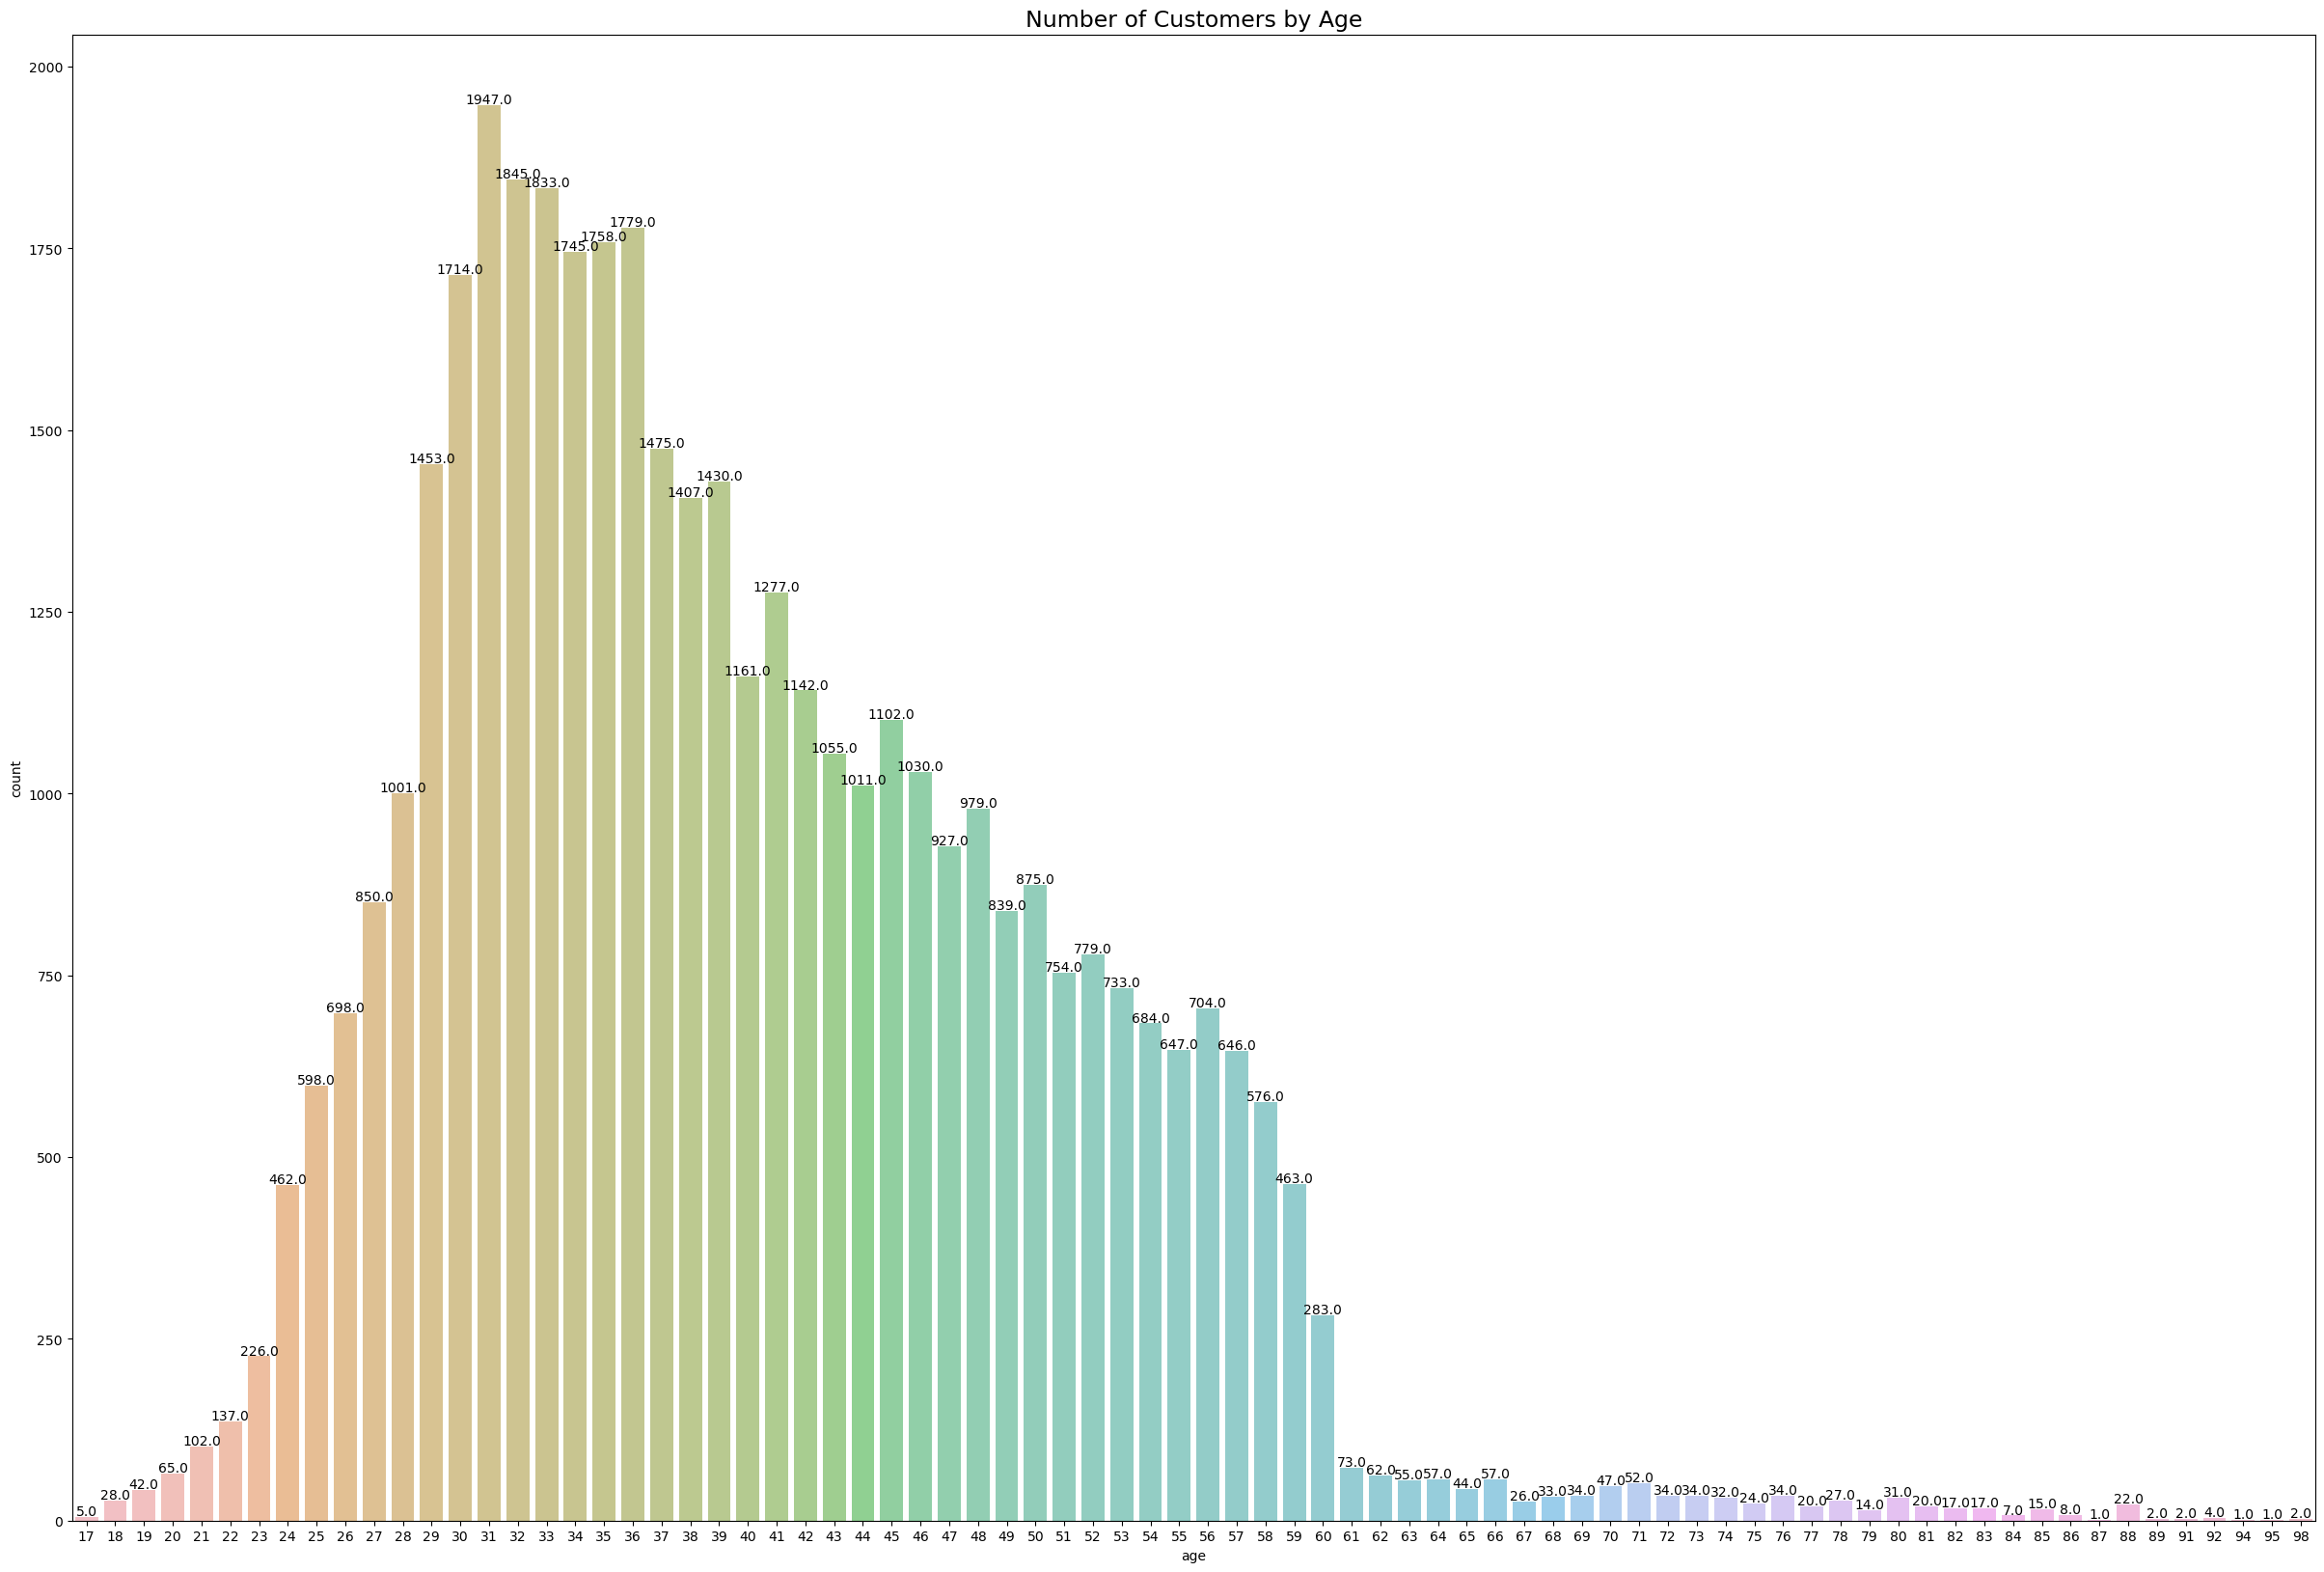

In [22]:
# melihat perbandingan jumlah nasabah berdasarkan umur
plt.rcParams['figure.figsize'] = (30, 20)
plt.title("Number of Customers by Age", fontsize=17)
ax = sns.countplot(x='age', data=df, alpha=0.6)
for i in ax.patches:
    ax.annotate(format(i.get_height(), '.1f'),
                (i.get_x() + i.get_width()/2., i.get_height()),
                ha='center',
                va='center',
                xytext=(0, 4),
                textcoords='offset points')

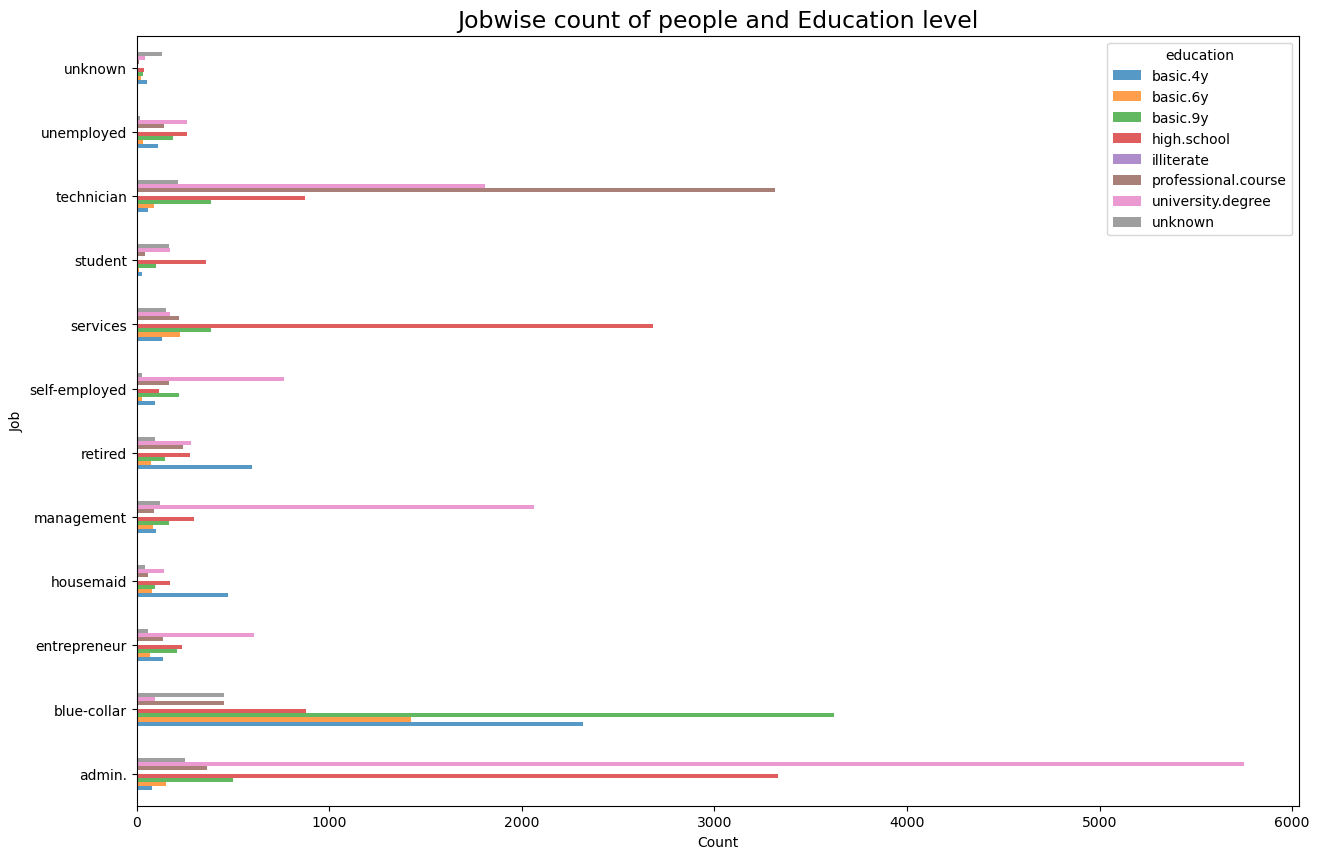

In [23]:
# jumlah nasabah berdasarkan pekerjaan dan tingkat pendidikannya
df_3 = pd.pivot_table(df,
                      columns='education',
                      index='job',
                      aggfunc='count',
                      values='age')
df_3.plot(kind='barh',
          stacked=False,
          figsize=(15, 10),
          alpha=0.75)
plt.title('Jobwise count of people and Education level', fontsize=17)
plt.ylabel('Job')
plt.xlabel('Count')
plt.show()

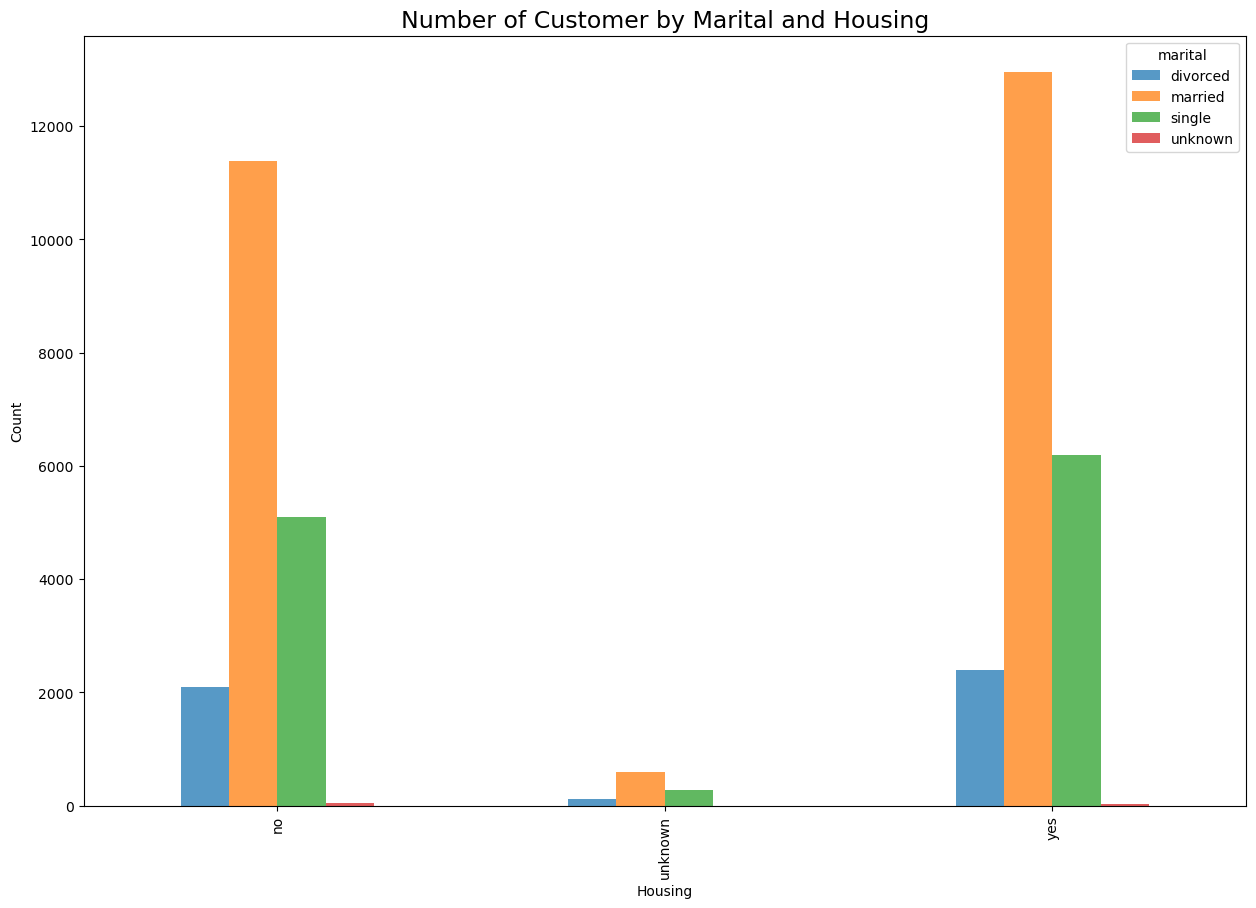

In [24]:
#  jumlah nasabah di masing-masing status pernikahan
df_4 = pd.pivot_table(df,
                      columns='marital',
                      index='housing',
                      aggfunc='count',
                      values='age')
df_4.plot(kind='bar',
          stacked=False,
          figsize=(15, 10),
          alpha=0.75)
plt.title('Number of Customer by Marital and Housing', fontsize=17)
plt.ylabel('Count')
plt.xlabel('Housing')
plt.show()

In [25]:
# Encoding data kategorikal
df_enc = df.copy()
le = preprocessing.LabelEncoder()


def transfrom(col):
    a = le.fit_transform(df[col])
    pd.DataFrame(a)
    df_enc[col] = a


for i in categoric_columns:
    transfrom(i)

df_enc

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subs.deposit
0,56,3,1,0,0,0,0,1,6,1,...,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,2,0,0,7,0,...,1,0,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,1,1,5,0,0,0,0,7,0,...,1,0,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,1,6,0,2,0,0,7,0,...,2,0,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,9,1,5,0,0,0,0,7,0,...,1,0,0,1,-1.1,94.767,-50.8,1.028,4963.6,1


In [26]:
# Split dataset into features(X) and labels(y)
X = df_enc.drop('subs.deposit', axis=1)
y = df_enc['subs.deposit']

In [27]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Scaling data
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.fit_transform(X_test)

# 1. Logistik Regression

In [28]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [29]:
# Evaluasi model
y_pred1 = lr.predict(X_test)
print("Accuracy score :", accuracy_score(y_test, y_pred1))

# Confusion Matrix
matrix1=confusion_matrix(y_test, y_pred1)
print("Confusion Matrix :\n", matrix1)

# Classification Report
print("Classification Report :\n", classification_report(y_test, y_pred1))

Accuracy score : 0.9066623492269085
Confusion Matrix :
 [[10654   265]
 [  888   546]]
Classification Report :
               precision    recall  f1-score   support

           0       0.92      0.98      0.95     10919
           1       0.67      0.38      0.49      1434

    accuracy                           0.91     12353
   macro avg       0.80      0.68      0.72     12353
weighted avg       0.89      0.91      0.90     12353



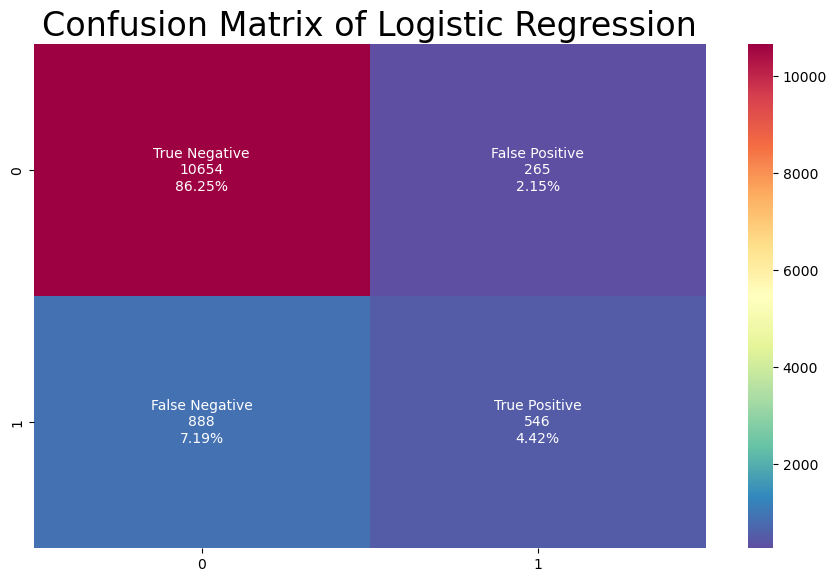

In [30]:
# Heatmap from Confusion Matrix
names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
counts = ["{0:0.0f}".format(value) for value in matrix1.flatten()]
percentages = ["{0:.2%}".format(value)
               for value in matrix1.flatten()/np.sum(matrix1)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2,
          v3 in zip(names, counts, percentages)]
labels = np.asarray(labels).reshape(2, 2)

f, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(matrix1, annot=labels, fmt='', cmap='Spectral_r')
plt.title("Confusion Matrix of Logistic Regression", fontsize=24)
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
plt.show()

Dari hasil logistic regression diatas, didapatkan informasi bahwa :
- Accuracy score 90,6%
- Prediksi True negative 10.654
- Prediksi False Negative 888
- Prediksi True Positive 546
- Prediksi False Positive 265
- Accuracy clasification report 91%

# 2. K-Nearest Neighbors (KNN)

In [31]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [32]:
# Evaluasi model
y_predknn = knn.predict(X_test)
print("Accuracy score :", accuracy_score(y_test, y_predknn))

# Confusion Matrix
matrixknn=confusion_matrix(y_test, y_predknn)
print("Confusion Matrix :\n", matrixknn)

# Classification Report
print("Classification Report :\n", classification_report(y_test, y_predknn))

Accuracy score : 0.8984861976847729
Confusion Matrix :
 [[10563   356]
 [  898   536]]
Classification Report :
               precision    recall  f1-score   support

           0       0.92      0.97      0.94     10919
           1       0.60      0.37      0.46      1434

    accuracy                           0.90     12353
   macro avg       0.76      0.67      0.70     12353
weighted avg       0.88      0.90      0.89     12353



In [33]:
# Improve model dan mencari nilai k yang paling optimal

error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    kn = KNeighborsClassifier(n_neighbors=i)
    kn.fit(X_train, y_train)
    pred_i = kn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error mean')

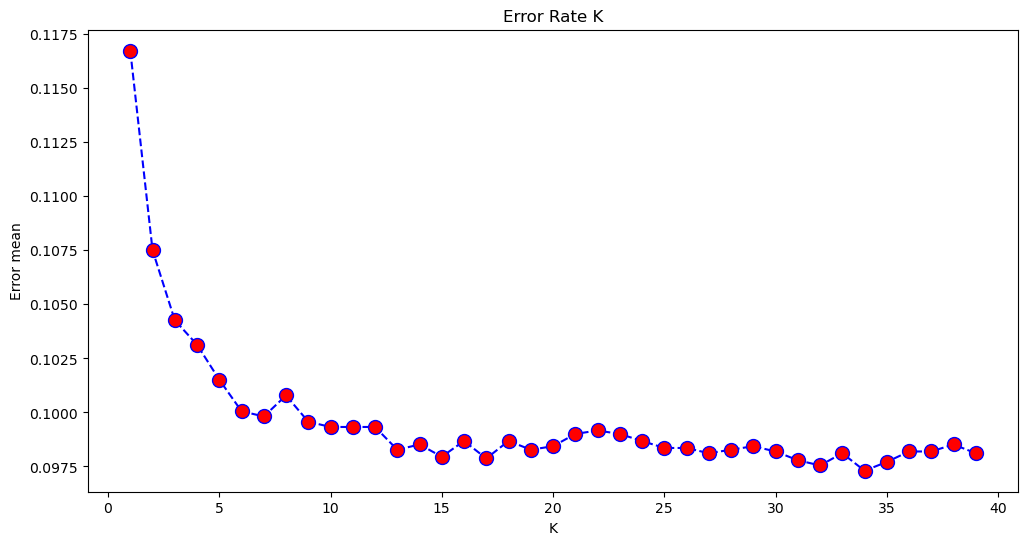

In [34]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate K')
plt.xlabel('K')
plt.ylabel('Error mean')

In [35]:
# Cek akurasi model untuk nilai k = 34
knn34 = KNeighborsClassifier(n_neighbors=34)
knn34.fit(X_train, y_train)

# Evaluasi model
y_pred2 = knn34.predict(X_test)
print("Accuracy score :", accuracy_score(y_test, y_pred2))

# Confusion Matrix
matrix2=confusion_matrix(y_test, y_pred2)
print("Confusion Matrix :\n", matrix2)

# Classification Report
print("Classification Report :\n", classification_report(y_test, y_pred2))

Accuracy score : 0.9026957014490408
Confusion Matrix :
 [[10743   176]
 [ 1026   408]]
Classification Report :
               precision    recall  f1-score   support

           0       0.91      0.98      0.95     10919
           1       0.70      0.28      0.40      1434

    accuracy                           0.90     12353
   macro avg       0.81      0.63      0.68     12353
weighted avg       0.89      0.90      0.88     12353



Dari hasil K-Nearest Neighbors (KNN) diatas, didapatkan informasi :
- Accuracy score 90%
- Prediksi True negative 10.743
- Prediksi False Negative 1026
- Prediksi True Positive 408
- Prediksi False Positive 176
- Accuracy clasification report 90%

# 3. Support Vector Machine (SVM)

In [36]:
svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [37]:
# Evaluasi model
y_pred3 = svm.predict(X_test)
print("Accuracy score :", accuracy_score(y_test, y_pred3))

# Confusion Matrix
matrix3 = confusion_matrix(y_test, y_pred3)
print("Confusion Matrix :\n", matrix3)

# Classification Report
print("Classification Report :\n", classification_report(y_test, y_pred3))

Accuracy score : 0.9067433012223751
Confusion Matrix :
 [[10683   236]
 [  916   518]]
Classification Report :
               precision    recall  f1-score   support

           0       0.92      0.98      0.95     10919
           1       0.69      0.36      0.47      1434

    accuracy                           0.91     12353
   macro avg       0.80      0.67      0.71     12353
weighted avg       0.89      0.91      0.89     12353



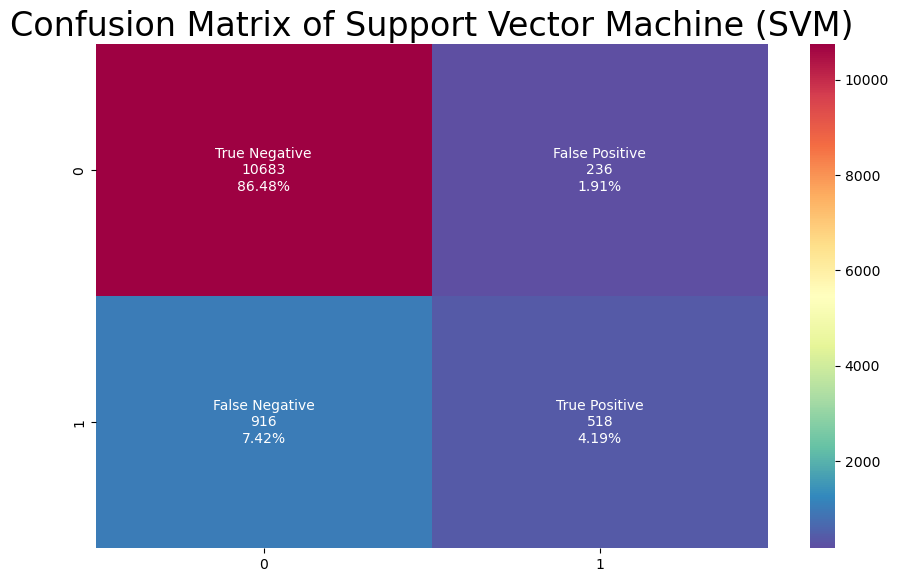

In [38]:
# Heatmap from Confusion Matrix
names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
counts = ["{0:0.0f}".format(value) for value in matrix3.flatten()]
percentages = ["{0:.2%}".format(value)
               for value in matrix3.flatten()/np.sum(matrix3)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2,
          v3 in zip(names, counts, percentages)]
labels = np.asarray(labels).reshape(2, 2)

f, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(matrix2, annot=labels, fmt='', cmap='Spectral_r')
plt.title("Confusion Matrix of Support Vector Machine (SVM)", fontsize=24)
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
plt.show()

Dari hasil Support Vector Machine (SVM) diatas, didapatkan informasi :

- Accuracy score 90,6%
- Prediksi True negative 10.683
- Prediksi False Negative 916
- Prediksi True Positive 518
- Prediksi False Positive 236
- Accuracy clasification report 91%

# 4. Decision Tree

In [39]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [40]:
# Evaluasi model
y_pred4 = dt.predict(X_test)
print("Accuracy score :", accuracy_score(y_test, y_pred4))

# Confusion Matrix
matrix4 = confusion_matrix(y_test, y_pred4)
print("Confusion Matrix :\n", matrix4)

# Classification Report
print("Classification Report :\n", classification_report(y_test, y_pred4))

Accuracy score : 0.8822957985914353
Confusion Matrix :
 [[10147   772]
 [  682   752]]
Classification Report :
               precision    recall  f1-score   support

           0       0.94      0.93      0.93     10919
           1       0.49      0.52      0.51      1434

    accuracy                           0.88     12353
   macro avg       0.72      0.73      0.72     12353
weighted avg       0.89      0.88      0.88     12353



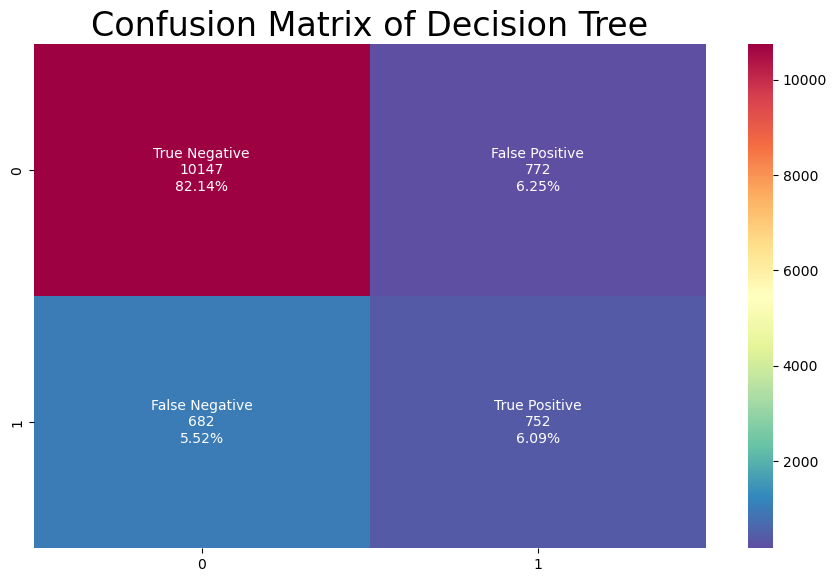

In [41]:
# Heatmap from Confusion Matrix
names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
counts = ["{0:0.0f}".format(value) for value in matrix4.flatten()]
percentages = ["{0:.2%}".format(value)
               for value in matrix4.flatten()/np.sum(matrix4)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2,
          v3 in zip(names, counts, percentages)]
labels = np.asarray(labels).reshape(2, 2)

f, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(matrix2, annot=labels, fmt='', cmap='Spectral_r')
plt.title("Confusion Matrix of Decision Tree", fontsize=24)
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
plt.show()

Dari hasil Decision Tree diatas, didapatkan informasi :
- Accuracy score 88%
- Prediksi True negative 10.153
- Prediksi False Negative 673
- Prediksi True Positive 761
- Prediksi False Positive 766
- Accuracy clasification report 88%

# 5. Random Forest

In [42]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [43]:
# Evaluasi model
y_pred5 = rf.predict(X_test)
print("Accuracy score :", accuracy_score(y_test, y_pred5))

# Confusion Matrix
matrix5 = confusion_matrix(y_test, y_pred5)
print("Confusion Matrix :\n", matrix5)

# Classification Report
print("Classification Report :\n", classification_report(y_test, y_pred5))

Accuracy score : 0.913786124827977
Confusion Matrix :
 [[10551   368]
 [  697   737]]
Classification Report :
               precision    recall  f1-score   support

           0       0.94      0.97      0.95     10919
           1       0.67      0.51      0.58      1434

    accuracy                           0.91     12353
   macro avg       0.80      0.74      0.77     12353
weighted avg       0.91      0.91      0.91     12353



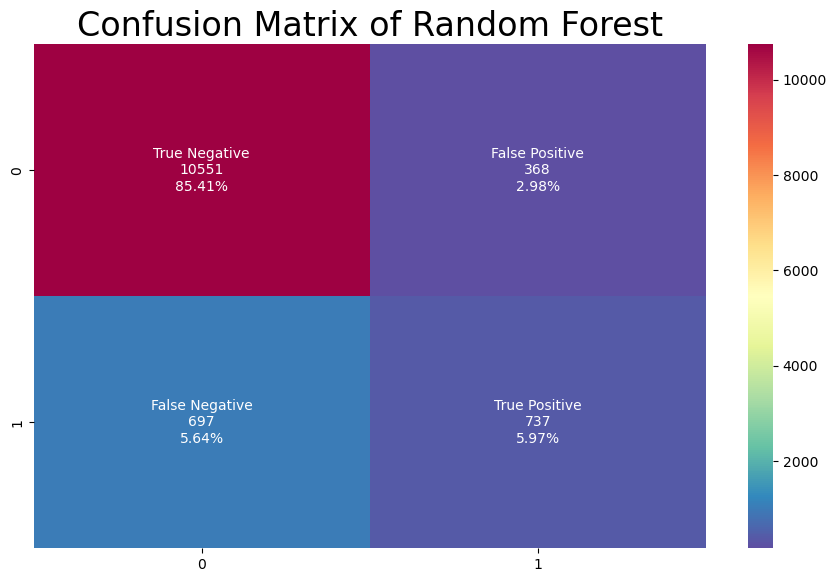

In [44]:
# Heatmap from Confusion Matrix
names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
counts = ["{0:0.0f}".format(value) for value in matrix5.flatten()]
percentages = ["{0:.2%}".format(value)
               for value in matrix5.flatten()/np.sum(matrix5)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2,
          v3 in zip(names, counts, percentages)]
labels = np.asarray(labels).reshape(2, 2)

f, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(matrix2, annot=labels, fmt='', cmap='Spectral_r')
plt.title("Confusion Matrix of Random Forest", fontsize=24)
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
plt.show()

Dari hasil Random Forest diatas, didapatkan informasi :
- Accuracy score 91%
- Prediksi True negative 10.552
- Prediksi False Negative 695
- Prediksi True Positive 739
- Prediksi False Positive 367
- Accuracy clasification report 91%

# 6. Naive Bayes

In [45]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [46]:
# Evaluasi model
y_pred6 = nb.predict(X_test)
print("Accuracy score :", accuracy_score(y_test, y_pred6))

# Confusion Matrix
matrix6 = confusion_matrix(y_test, y_pred6)
print("Confusion Matrix :\n", matrix6)

# Classification Report
print("Classification Report :\n", classification_report(y_test, y_pred6))

Accuracy score : 0.8479721525135595
Confusion Matrix :
 [[9620 1299]
 [ 579  855]]
Classification Report :
               precision    recall  f1-score   support

           0       0.94      0.88      0.91     10919
           1       0.40      0.60      0.48      1434

    accuracy                           0.85     12353
   macro avg       0.67      0.74      0.69     12353
weighted avg       0.88      0.85      0.86     12353



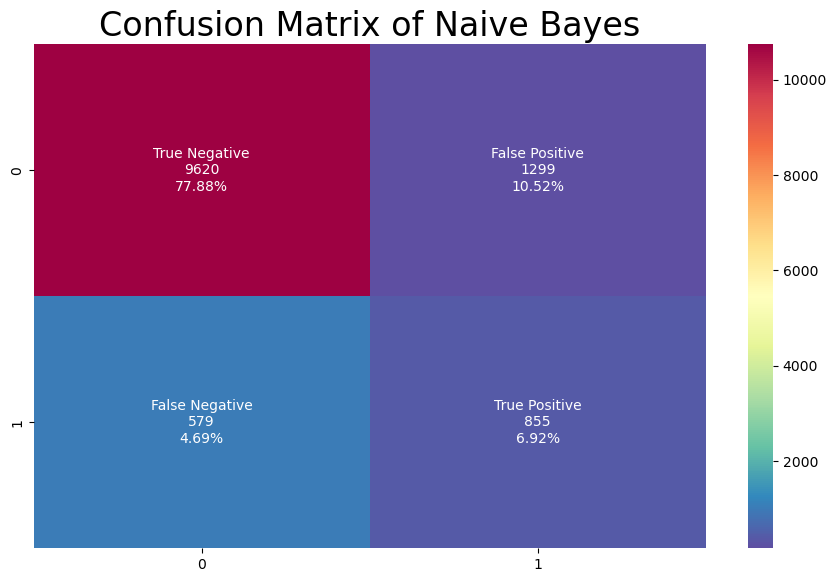

In [47]:
# Heatmap from Confusion Matrix
names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
counts = ["{0:0.0f}".format(value) for value in matrix6.flatten()]
percentages = ["{0:.2%}".format(value)
               for value in matrix6.flatten()/np.sum(matrix6)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2,
          v3 in zip(names, counts, percentages)]
labels = np.asarray(labels).reshape(2, 2)

f, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(matrix2, annot=labels, fmt='', cmap='Spectral_r')
plt.title("Confusion Matrix of Naive Bayes", fontsize=24)
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
plt.show()

Dari hasil Naive Bayes diatas, didapatkan informasi :
- Accuracy score 84%
- Prediksi True negative 9620
- Prediksi False Negative 579
- Prediksi True Positive 855
- Prediksi False Positive 1299
- Accuracy clasification report 85%